# Mental Health Prediction Using Machine Learning

The 2024 Kaggle Playground Series aims to provide engaging and practical datasets for machine learning enthusiasts to enhance their skills. This project focuses on Mental Health Prediction, using data from a mental health survey to analyze the factors that contribute to depression. The goal is to build a predictive model that determines whether an individual is experiencing depression based on various factors present in the dataset.

The dataset contains missing values, requiring preprocessing techniques such as data imputation and visualization for better insights. Various data analysis techniques, including count plots, pie charts, and heatmaps, will be used to understand the key contributing factors to depression.

## Project Objectives

The main objectives of this project are:

- Understand the Dataset – Perform an in-depth exploration of the provided training, testing, sample submission, and original data to gain insights into its structure and attributes.
- Handle Missing Values – Identify and impute missing values to ensure data quality and improve model performance.
- Data Visualization & Analysis – Generate multiple visualization plots (count plots, pie charts, heatmaps, etc.) to analyze key factors affecting mental health and depression.
- Model Implementation – Utilize the CatBoost model with optimized parameters to predict depression based on survey responses.
- Enhance Model Performance – Implement Repeated Stratified K-Fold Cross-Validation to refine predictions and improve the reliability of the model.
- Evaluate Results – Measure the model’s accuracy and effectiveness in classifying individuals with or without depression based on survey responses.

## Project Scope

<b>In-Scope:</b>

- Dataset Exploration – Understanding the data, missing values, and feature distributions.
- Data Preprocessing – Cleaning the dataset, handling missing values, and preparing it for modeling.
- Feature Engineering – Creating meaningful features from the dataset to enhance predictions.
- Data Visualization – Using plots and statistical analysis to explore depression risk factors.
- Model Selection & Implementation – Implementing different models for prediction.
- Performance Improvement – Using Repeated Stratified K-Fold for better accuracy. <b>MIGHT BE REVISED</B>
- Prediction & Insights – Determining whether a person is at risk of depression based on analyzed factors.

<b>Out-of-Scope:</b>

- Medical Diagnosis – The project does not provide a medical diagnosis but rather a statistical analysis and prediction.
- Real-time Monitoring – The model will not be deployed for real-time monitoring of mental health conditions.
- Therapeutic Interventions – The project does not propose medical or psychological treatment solutions.

## Data Source

The dataset used in this project originates from the 2024 Kaggle Playground Series (Season 4, Episode 11) competition, titled "<a href="https://www.kaggle.com/competitions/playground-series-s4e11/overview">Exploring Mental Health Data</a>". The data was derived from the <a href="https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis">Depression Survey/Dataset</a> and has been augmented with synthetic data to increase its size.

The dataset consists of 234,500 observations, with a 6:4 train-test split. It contains 20 features, each representing different attributes related to an individual's mental health and well-being. The target variable, "Depression," is a binary flag (0 or 1) indicating whether an individual is experiencing depression.

<b>Understanding the Features</b>

<table border="1">
  <tr>
    <th><b>Column Name</b></th>
    <th><b>Description</b></th>
  </tr>
  <tr>
    <td>ID</td>
    <td>Unique identifier for each participant in the dataset</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Name of the participant</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Gender of participant (listed as Male or Female)</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age of the participant</td>
  </tr>
  <tr>
    <td>City</td>
    <td>The city that the participant resides</td>
  </tr>
  <tr>
    <td>Working Professional or Student</td>
    <td>Indicates whether the participant is a working professional or a student</td>
  </tr>
  <tr>
    <td>Profession</td>
    <td>Participant's profession or field of study</td>
  </tr>
  <tr>
    <td>Academic Pressure</td>
    <td>Level of pressure the participant's experiences in academics (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Work Pressure</td>
    <td>Level of pressure the participant's experiences at their job (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>CGPA</td>
    <td>Cumulative Grade Point Average of the participant</td>
  </tr>
  <tr>
    <td>Study Satisfaction</td>
    <td>The participant's satisfaction with their studies (on a scale of 1-5)</td>
  </tr>
    </tr>
    <tr>
    <td>Job Satisfaction</td>
    <td>The participant's satisfaction with their jobs (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Sleep Duration</td>
    <td>Average duration of sleep per night</td>
  </tr>
  <tr>
    <td>Dietary Habits</td>
    <td>Dietary habits of the participant (listed mainly as healthy, moderate and unhealthy)</td>
  </tr>
  <tr>
    <td>Degree</td>
    <td>Level of education the participant is pursuing or has completed</td>
  </tr>
  <tr>
    <td>Have you ever had suicidal thoughts?</td>
    <td>Indicates whether the participant has ever had suicidal thoughts (listed as yes or no)</td>
  </tr>
  <tr>
    <td>Work/Study Hours</td>
    <td>Number of hours the participant spends working or studying per day on average</td>
  </tr>
  <tr>
    <td>Financial Stress</td>
    <td>Level of financial stress the participant experiences (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Family History of Mental Illness</td>
    <td>Indicates whether the participant has a family history of mental illness (listed as yes or no)</td>
  </tr>
  <tr>
    <td>Depression</td>
    <td>The participant's depression status (listed as 0 or 1)</td>
  </tr>
</table>


## Step 1. Environment Set-Up and Data Import

In [1]:
#!pip install squarify 

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#!pip install xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
from sklearn.model_selection import GridSearchCV

In [2]:
# data import
train = pd.read_csv("/workspaces/myfolder/MentalHealth_Workbench/data/train.csv")
test = pd.read_csv("/workspaces/myfolder/MentalHealth_Workbench/data/test.csv")

## Step 2. Exploratory Data Analysis

Exploratory data analysis (EDA) is crucial in data science projects because it helps us understand the structure and characteristics of the data we're working with. By exploring variables, identifying patterns, detecting anomalies, and visualizing relationships, EDA enables us to make informed decisions about data preprocessing, feature engineering, and model selection. It also plays a key role in uncovering insights and formulating hypotheses, laying the groundwork for more accurate modeling and impactful conclusions.

In [3]:
print("First 5 rows of dataset:")
train.head()

First 5 rows of dataset:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
print(f"There are {train.shape[1]} columns and {train.shape[0]} rows in the train dataset.")

There are 20 columns and 140700 rows in the train dataset.


In [5]:
print("Column names and data type of each column:")
train.dtypes

Column names and data type of each column:


id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [6]:
print("Summary statistics for the numeric columns:")
train.describe()

Summary statistics for the numeric columns:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


Checking for missing values in each column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                  

<Axes: title={'center': 'Visualizing Missing Values'}>

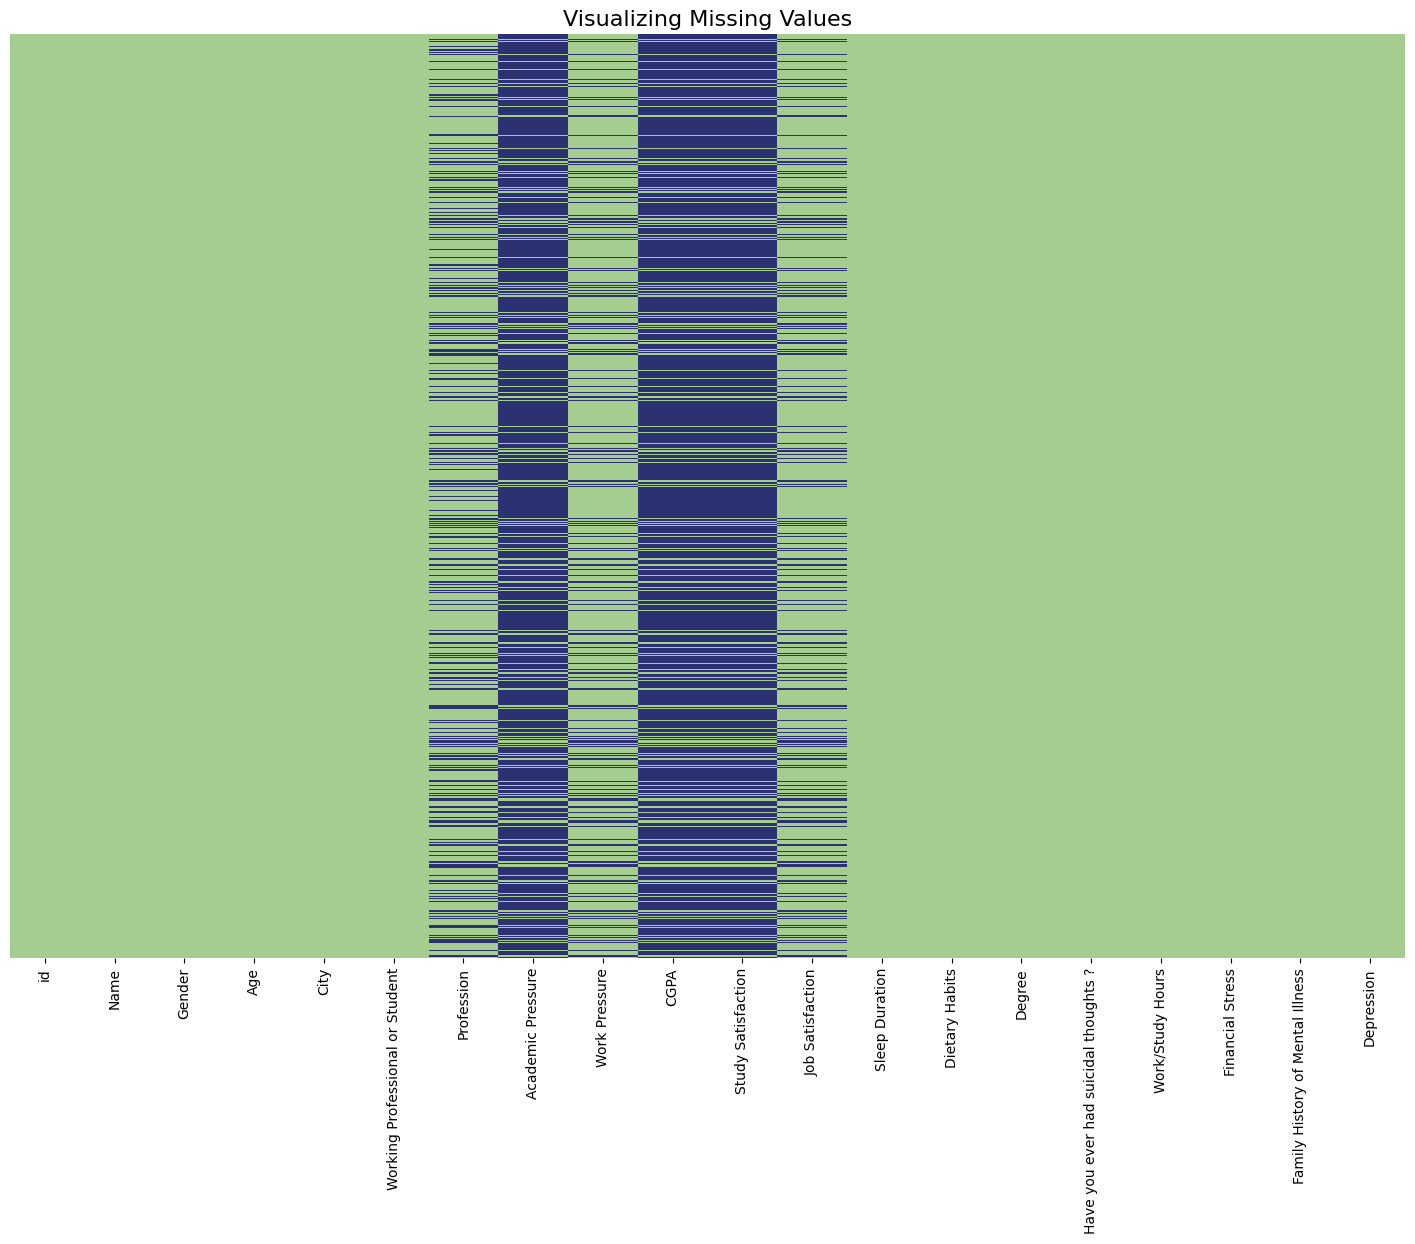

In [7]:
print("Checking for missing values in each column:")
print(train.isnull().sum())

plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values", fontsize=16)
sns.heatmap(train.isnull(), cmap="crest", cbar=False, yticklabels=False)

In [8]:
# Define the target column
target_column = 'Depression'

# Select categorical and numerical columns (initial)
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(exclude=['object']).columns.drop(target_column)

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: Depression

Categorical Columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Numerical Columns: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [9]:
for column in categorical_columns:
    num_unique = train[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'Name' has 422 unique categories.
'Gender' has 2 unique categories.
'City' has 98 unique categories.
'Working Professional or Student' has 2 unique categories.
'Profession' has 64 unique categories.
'Sleep Duration' has 36 unique categories.
'Dietary Habits' has 23 unique categories.
'Degree' has 115 unique categories.
'Have you ever had suicidal thoughts ?' has 2 unique categories.
'Family History of Mental Illness' has 2 unique categories.


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


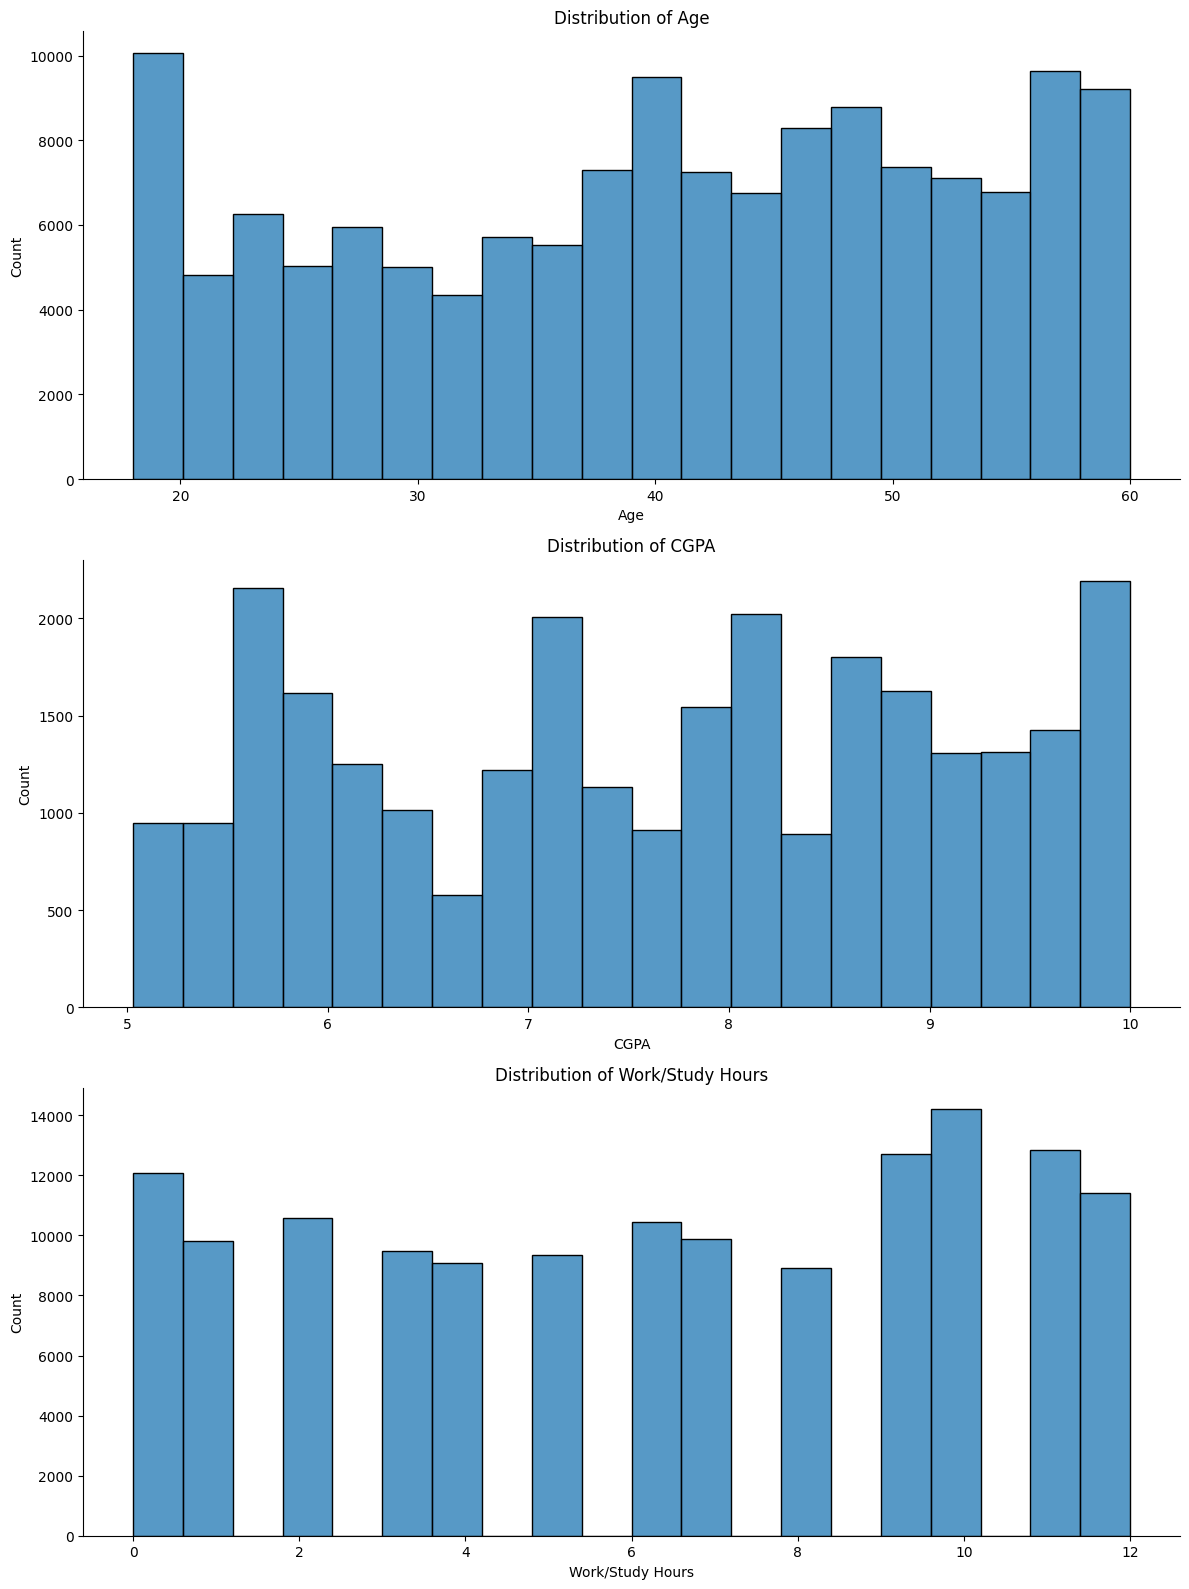

In [10]:
# Distribution of Numerical Variables
numerical_columns_to_plot = ["Age", "CGPA", "Work/Study Hours"]

plt.figure(figsize=(12, 16)) 

for i, column in enumerate(numerical_columns_to_plot):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=train, x=column, kde=False, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [11]:
print("The skewness of columns:")
print(train[numerical_columns].skew())

The skewness of columns:
id                    0.000000
Age                  -0.217977
Academic Pressure    -0.133977
Work Pressure         0.018515
CGPA                 -0.073636
Study Satisfaction    0.011764
Job Satisfaction      0.054361
Work/Study Hours     -0.128169
Financial Stress      0.035603
dtype: float64


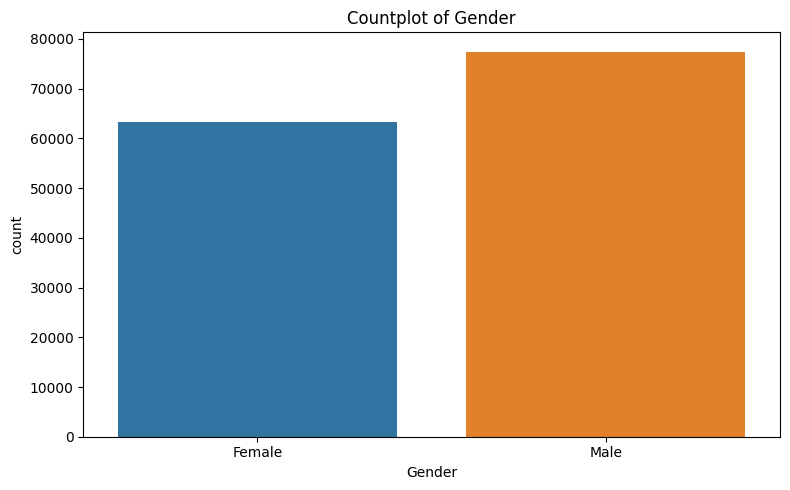

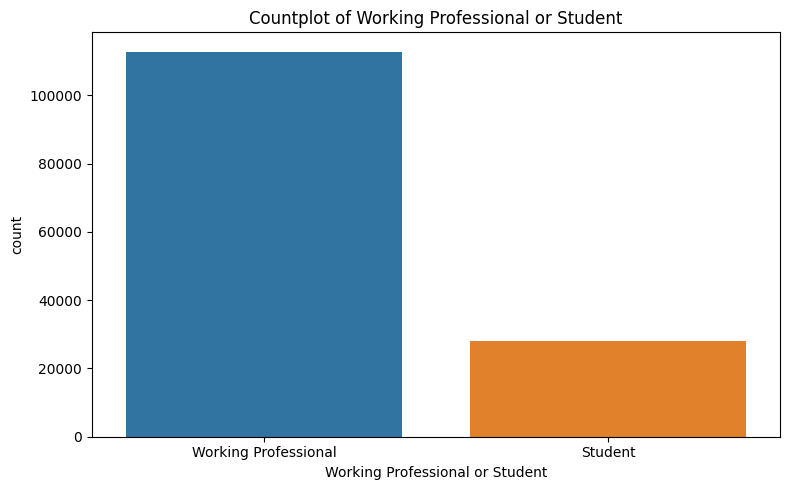

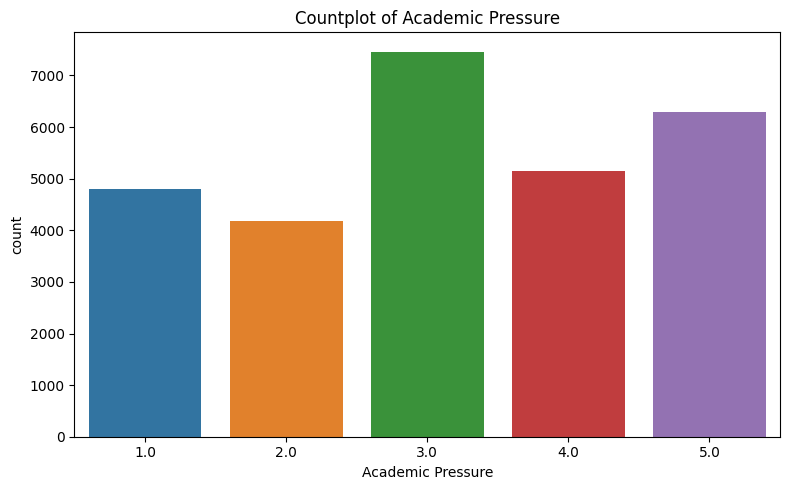

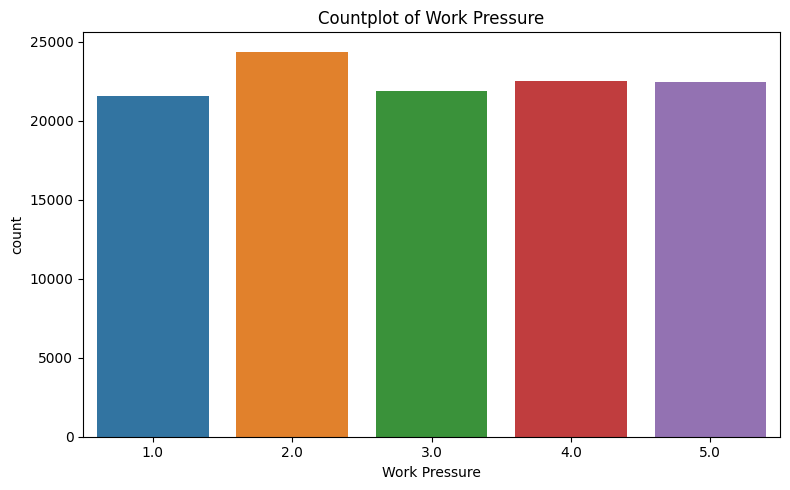

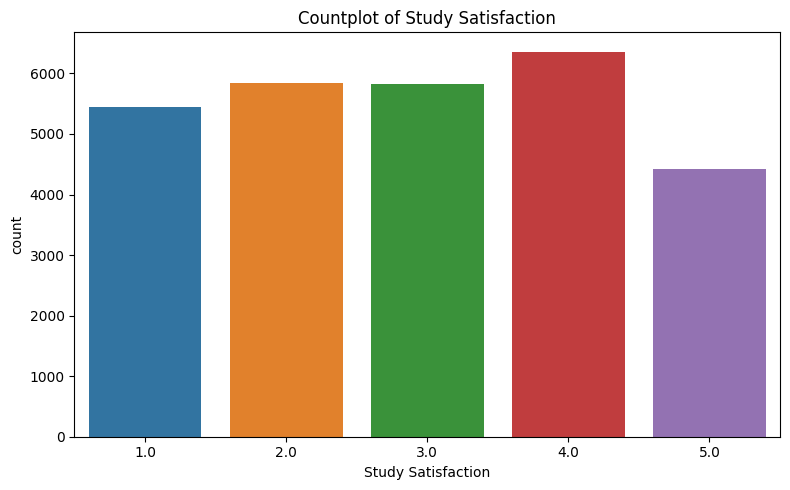

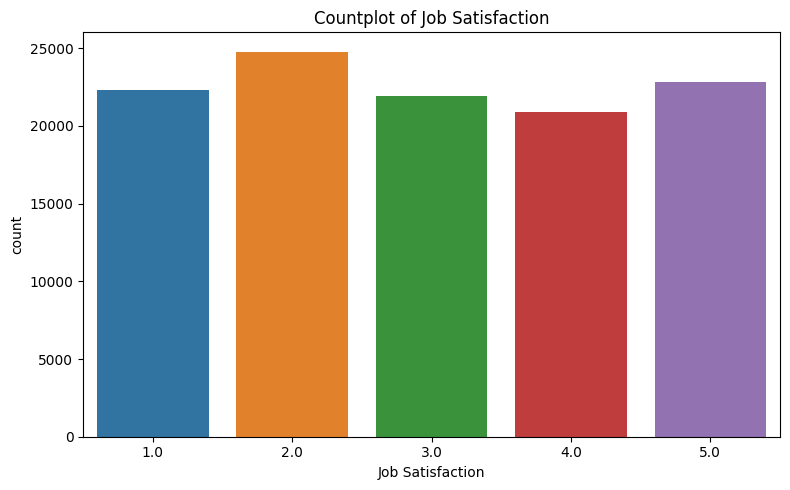

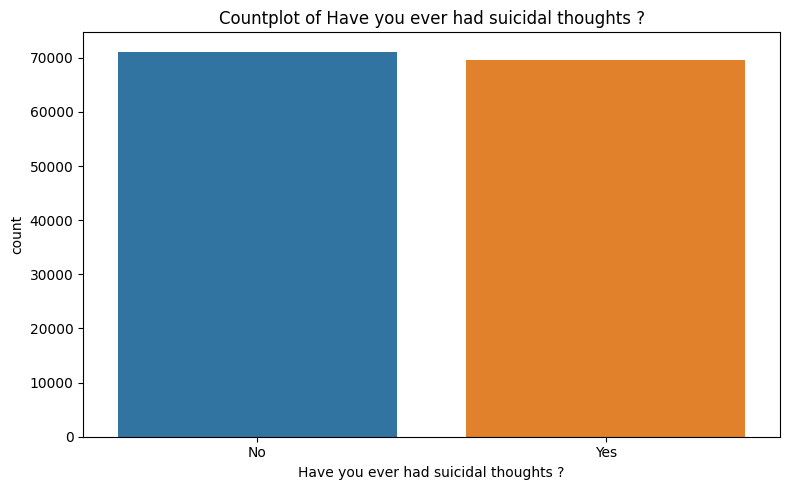

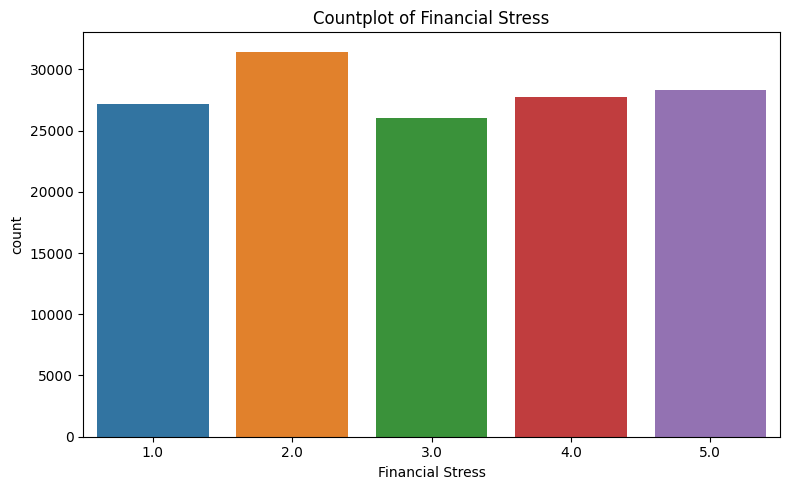

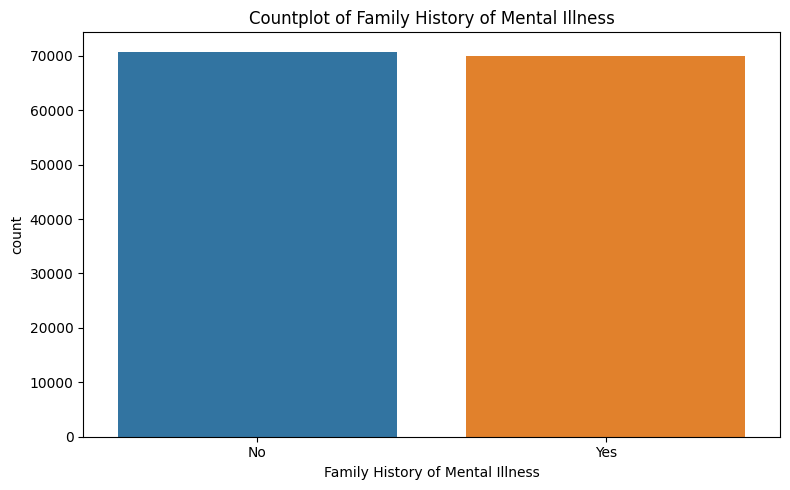

In [12]:
# Distribution of Categorical Features
categorical_columns_to_plot = ['Gender', 'Working Professional or Student', 'Academic Pressure', 
                       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                       'Have you ever had suicidal thoughts ?', 'Financial Stress', 
                       'Family History of Mental Illness']

# Plot countplots for each categorical column
for column in categorical_columns_to_plot:
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

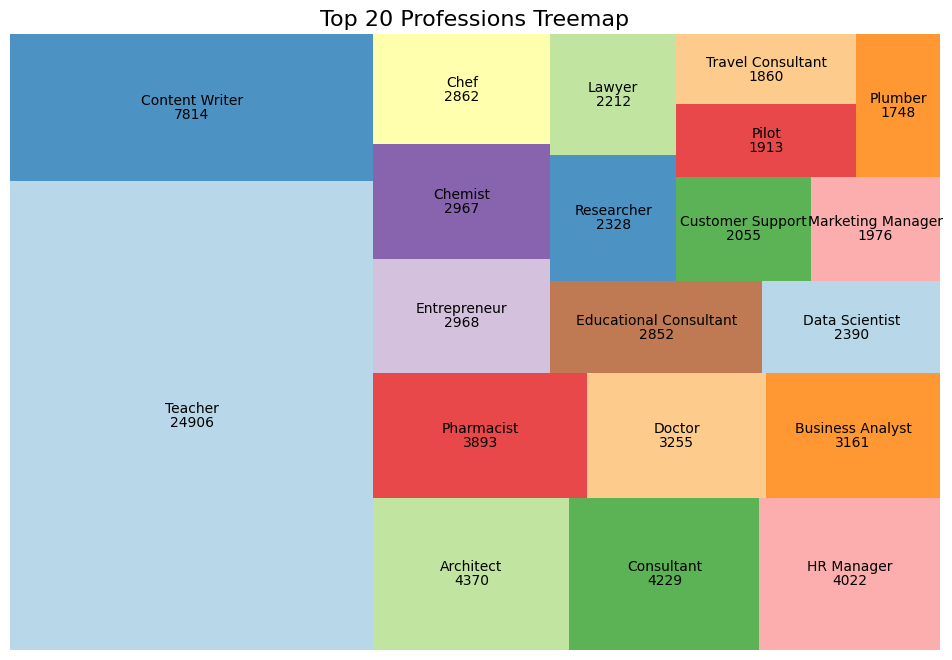

In [13]:
# Find the top 20 professions
profession_counts = train['Profession'].value_counts().nlargest(20)

# Create Treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=profession_counts.values, 
              label=profession_counts.index, 
              value=profession_counts.values, 
              color=sns.color_palette("Paired", 20), 
              alpha=0.8)

# Customize Plot
plt.title("Top 20 Professions Treemap", fontsize=16)
plt.axis("off")  # Hide axes
plt.show()

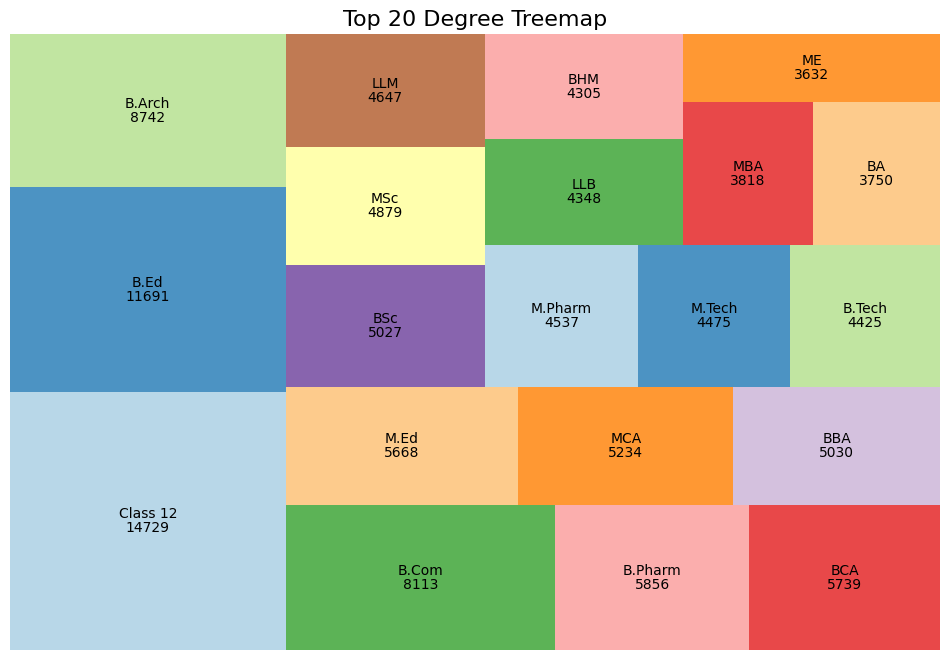

In [14]:
# Find the top 20 degrees
degree_counts = train['Degree'].value_counts().nlargest(20)

# Create Treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=degree_counts.values, 
              label=degree_counts.index, 
              value=degree_counts.values, 
              color=sns.color_palette("Paired", 20), 
              alpha=0.8)

# Customize Plot
plt.title("Top 20 Degree Treemap", fontsize=16)
plt.axis("off")  # Hide axes
plt.show()

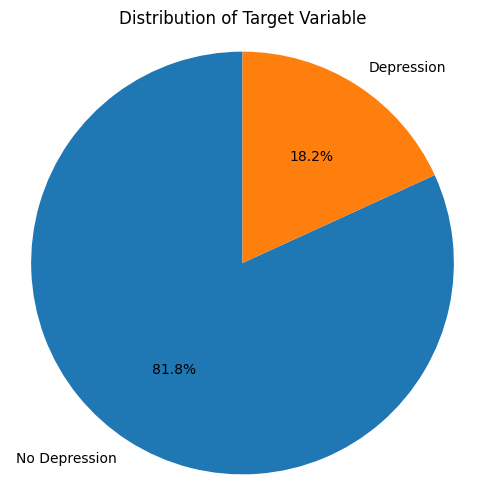

In [15]:
# Distribution of Depression
class_counts = train[target_column].value_counts().sort_index()
labels = ["No Depression", "Depression"]
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

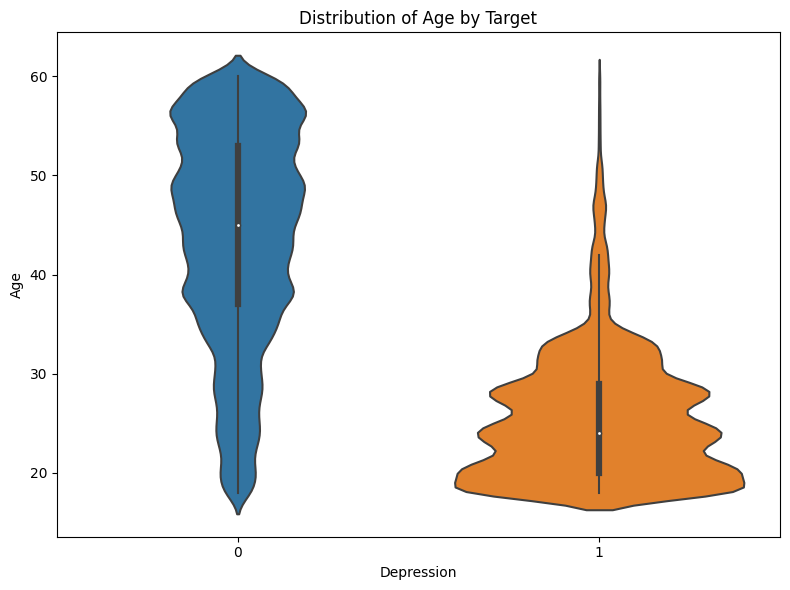

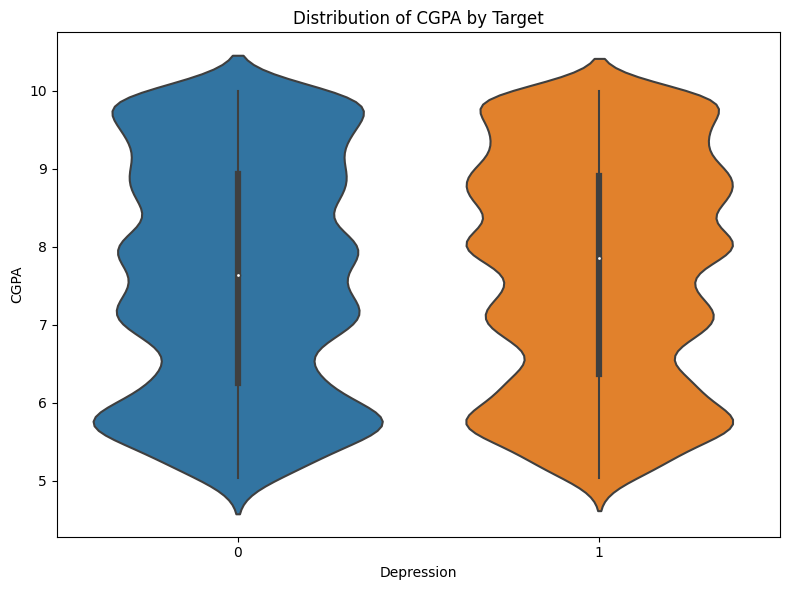

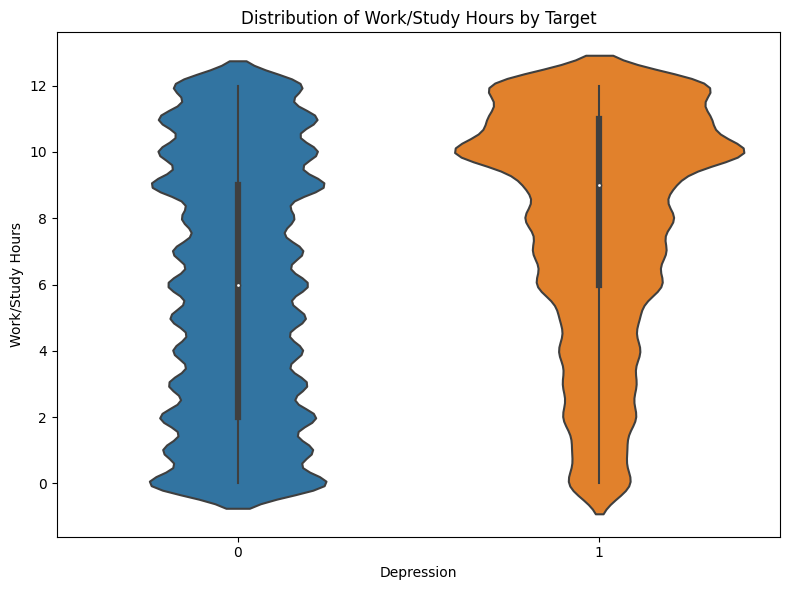

In [16]:
# Distribution of Numerical Features by Presence of Depression
for column in numerical_columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train, x=target_column, y=column) 
    plt.title(f'Distribution of {column} by Target')

    plt.tight_layout()
    plt.show()

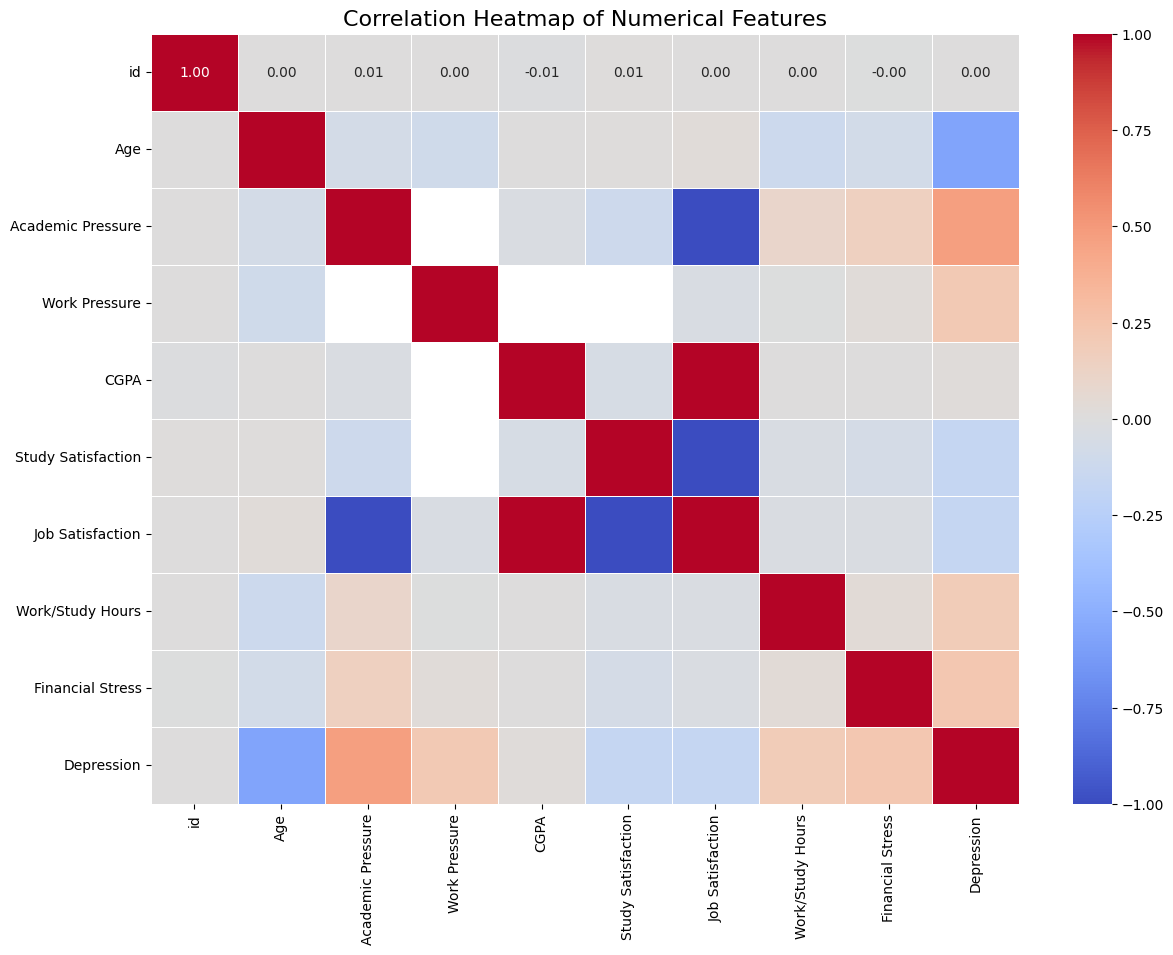

In [17]:
# Calculate the correlation matrix
correlation_matrix = train.corr(numeric_only=True)

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create a heatmap with custom styling
sns.heatmap(correlation_matrix, 
            annot=True,        # Display correlation values
            fmt=".2f",         # Format values to 2 decimal places
            cmap="coolwarm",   # Color scheme: Blue (negative) to Red (positive)
            linewidths=0.5,    # Add grid lines for better readability
            cbar=True)         # Show the color bar

# Set the title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)

# Show the heatmap
plt.show()

## Step 3. Data Transformation/Wrangling

Data wrangling is essential in the model creation cycle as it ensures data quality, prepares data for modeling techniques, uncovers insights, and supports reproducibility. It forms the foundation upon which accurate, reliable, and actionable models can be derived from data in the field of data science. These steps are done based on what our exploratory data analysis (EDA) uncovered. In this case, we will be imputing our missing variables, encoding our categorical variables, and splitting our dataset for testing and training.

In [18]:
# Select rows where "Academic Pressure" and "Work Pressure" are NOT missing
filtered_data = train.dropna(subset=["Academic Pressure", "Work Pressure"])

# Display the filtered dataset
print(filtered_data)

Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


In [19]:
# Select rows where "Study Satisfaction" and "Job Satisfaction" are NOT missing
filtered_data = train.dropna(subset=["Study Satisfaction", "Job Satisfaction"])

# Display the filtered dataset
print(filtered_data)

# since both are students will defer to academic/study responses.

            id   Name Gender   Age       City Working Professional or Student  \
1428      1428  Rishi   Male  29.0   Srinagar                         Student   
116703  116703   Neil   Male  25.0  Bangalore                         Student   

       Profession  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
1428          NaN                3.0            NaN  9.63                 3.0   
116703        NaN                4.0            NaN  9.44                 5.0   

        Job Satisfaction     Sleep Duration Dietary Habits   Degree  \
1428                 3.0          7-8 hours       Moderate  M.Pharm   
116703               2.0  Less than 5 hours      Unhealthy      PhD   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
1428                                      No               8.0   
116703                                   Yes               4.0   

        Financial Stress Family History of Mental Illness  Depression  
1428                 5.0   

In [20]:
# Missing value treatment
# Merging the Pressure and Satisfaction columns

# Impute missing values in "Work/Study Pressure" with values from "Work Pressure"
train["Work/Study Pressure"] = train["Academic Pressure"].copy().fillna(train["Work Pressure"])

# Impute missing values in "Work/Study Satisfaction" with values from "Job Satisfaction"
train["Work/Study Satisfaction"] = train["Study Satisfaction"].copy().fillna(train["Job Satisfaction"])

In [21]:
for column in categorical_columns:
    num_unique = train[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'Name' has 422 unique categories.
'Gender' has 2 unique categories.
'City' has 98 unique categories.
'Working Professional or Student' has 2 unique categories.
'Profession' has 64 unique categories.
'Sleep Duration' has 36 unique categories.
'Dietary Habits' has 23 unique categories.
'Degree' has 115 unique categories.
'Have you ever had suicidal thoughts ?' has 2 unique categories.
'Family History of Mental Illness' has 2 unique categories.


In [22]:
train['Sleep Duration'].unique()

# Define a mapping dictionary with estimated average sleep duration
sleep_duration_map = {
    'Less than 5 hours': 4.5,
    'than 5 hours': 4.5,  # Possible typo
    '1-2 hours': 1.5,
    '2-3 hours': 2.5,
    '3-4 hours': 3.5,
    '4-5 hours': 4.5,
    '4-6 hours': 5.0,
    '5-6 hours': 5.5,
    '6-7 hours': 6.5,
    '6-8 hours': 7.0,
    '7-8 hours': 7.5,
    '8-9 hours': 8.5,
    '9-11 hours': 10.0,
    '10-11 hours': 10.5,
    '8 hours': 8.0,
    '9-6 hours': 7.5,  # Likely meant as a time range
    '9-5': 7.5,  # Likely a typo
    '9-5 hours': 7.5,
    '10-6 hours': 8.0,
    'More than 8 hours': 9.0,
    '45': 6.5, # divided by 7
    '49 hours': 7, # divided by 7
    '35-36 hours': 5, # divided by 7
    '40-45 hours': 6, # divided by 7
    '45-48 hours': 6.5, # divided by 7
    '55-66 hours': 8.5, # divided by 7
    
    # Possible erroneous entries replaced with NaN
    'Moderate': np.nan,
    'Unhealthy': np.nan,
    'Indore': np.nan,
    'Pune': np.nan,
    'No': np.nan,
    'Work_Study_Hours': np.nan,
    'Sleep_Duration': np.nan  # Column header mistakenly included

}

# Replace the categories with numerical values
train['Sleep Duration (Hours)'] = train['Sleep Duration'].map(sleep_duration_map)

# Display the unique mapped values
print(train['Sleep Duration (Hours)'].unique())

# impute missing with median value
train['Sleep Duration (Hours)'] = train['Sleep Duration (Hours)'].fillna(train['Sleep Duration (Hours)'].median())

[ 9.   4.5  5.5  7.5  nan  1.5  7.   5.   6.5 10.5  8.5  6.  10.   2.5
  3.5  8. ]


In [23]:
train['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [24]:
# Create mapping dictionary
diet_mapping = {
    'Healthy': 'Healthy',
    'More Healthy': 'Healthy',
    'Unhealthy': 'Unhealthy',
    'Less than Healthy': 'Unhealthy',
    'No Healthy': 'Unhealthy',
    'Less Healthy': 'Unhealthy',
    'Moderate': 'Moderate',

    # Map irrelevant or erroneous entries to Unknown
    'Yes': "Unknown",
    'Pratham': "Unknown",
    'BSc': "Unknown",
    'Gender': "Unknown",
    '3': "Unknown",
    'Mihir': "Unknown",
    '1.0': "Unknown",
    'Hormonal': "Unknown",
    'Electrician': "Unknown",
    'M.Tech': "Unknown",
    'Vegas': "Unknown",
    'No': "Unknown",
    'Male': "Unknown",
    'Indoor': "Unknown",
    'Class 12': "Unknown",
    '2': "Unknown"
}

# Apply mapping
train['Dietary Habits'] = train['Dietary Habits'].map(diet_mapping)

In [25]:
# Feature Selection
# dropping old pressure and satisfaction columns
# dropping id and name columns because do not need identifiers to model
# dropping CGPA because very weak correlation and lot of missing values
# FIND JUSTIFICATION TO DROP CITY AND DEGREE
train = train.drop(["Academic Pressure", "Work Pressure", "Study Satisfaction", "Job Satisfaction", "id", "Name", "CGPA", 'City', 'Degree'], axis=1)

print(train.isnull().sum())

Gender                                       0
Age                                          0
Working Professional or Student              0
Profession                               36630
Sleep Duration                               0
Dietary Habits                               4
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
Work/Study Pressure                         21
Work/Study Satisfaction                     15
Sleep Duration (Hours)                       0
dtype: int64


In [26]:
count_other = (train['Profession'] == "Other").sum()
print(f'Occurrences of "Other": {count_other}')

# Missing value treatment
# Fill missing Profession- CONFIRM if want to impute with 'Other'
train["Profession"] = train["Profession"].fillna("Other")

Occurrences of "Other": 0


In [27]:
train = train.dropna()

In [28]:
print(train.isnull().sum())
print(train.shape)

Gender                                   0
Age                                      0
Working Professional or Student          0
Profession                               0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Work/Study Pressure                      0
Work/Study Satisfaction                  0
Sleep Duration (Hours)                   0
dtype: int64
(140663, 14)


In [29]:
# # Repeat with test dataset

# # Impute missing values in "Work/Study Pressure" with values from "Work Pressure"
# test["Work/Study Pressure"] = test["Academic Pressure"].copy().fillna(test["Work Pressure"])

# # Impute missing values in "Work/Study Satisfaction" with values from "Job Satisfaction"
# test["Work/Study Satisfaction"] = test["Study Satisfaction"].copy().fillna(test["Job Satisfaction"])

# # Feature Selection
# test = test.drop(["Academic Pressure", "Work Pressure", "Study Satisfaction", "Job Satisfaction", "id", "Name", "CGPA"], axis=1)

# # Fill missing Profession- CONFIRM if want to impute with 'Other'
# test["Profession"] = test["Profession"].fillna("Other")

# # Drop remaining rows with missing values
# test = test.dropna()

In [30]:
# print(test.isnull().sum())
# print(test.shape)

## Step 4: Modelling

Modeling in the data science process involves the application of machine learning algorithms to analyze data, make predictions, or uncover patterns. It is a pivotal phase where the insights gleaned from data are translated into actionable decisions and solutions.

Machine learning models are employed to address various tasks, such as classification, regression, clustering, and recommendation systems, depending on the nature of the problem at hand. These models learn from historical data to generalize patterns and make predictions on new, unseen data.

In [31]:
# Prepare features and target
def prepare_features(df, target):
    features = df.columns.drop(target)
    X = df[features]
    y = df[target]

    # Convert categorical features into dummy variables
    X = pd.get_dummies(X, drop_first=True)  # drop_first avoids multicollinearity

    return X, y

In [32]:
X, y = prepare_features(train, 'Depression')
X.columns

Index(['Age', 'Work/Study Hours', 'Financial Stress', 'Work/Study Pressure',
       'Work/Study Satisfaction', 'Sleep Duration (Hours)', 'Gender_Male',
       'Working Professional or Student_Working Professional',
       'Profession_Accountant', 'Profession_Analyst',
       ...
       'Sleep Duration_Pune', 'Sleep Duration_Sleep_Duration',
       'Sleep Duration_Unhealthy', 'Sleep Duration_Work_Study_Hours',
       'Sleep Duration_than 5 hours', 'Dietary Habits_Moderate',
       'Dietary Habits_Unhealthy', 'Dietary Habits_Unknown',
       'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_Yes'],
      dtype='object', length=112)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape, "\n" + "Validation data shape:", X_test.shape)

Training data shape: (112530, 112) 
Validation data shape: (28133, 112)


In [34]:
def create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, regressor):
    # Create the pipeline with the specified regressor
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
        ('regressor', regressor)        # The regressor passed as an argument
    ])

    # Start the timer
    start_time = time.time()

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Stop the timer
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display evaluation metrics
    print(f"Regressor: {regressor.__class__.__name__}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Time elapsed: {elapsed_time:.2f} seconds")

In [35]:
# To use the function with different regressors:
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             RandomForestRegressor(n_estimators=100, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             SVR(kernel='poly', C=1.0, epsilon=0.1))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))

Regressor: RandomForestRegressor
Mean Absolute Error: 0.10
Mean Squared Error: 0.05
R² Score: 0.67
Time elapsed: 43.22 seconds
Regressor: GradientBoostingRegressor
Mean Absolute Error: 0.12
Mean Squared Error: 0.05
R² Score: 0.68
Time elapsed: 20.46 seconds
Regressor: ElasticNet
Mean Absolute Error: 0.30
Mean Squared Error: 0.15
R² Score: -0.00
Time elapsed: 0.58 seconds


## Step 5: Model Tuning

## Step 6: Model Evaluation and Selection

Model evaluation and comparison are indispensable in the data science process as they validate the effectiveness and reliability of predictive models. By systematically evaluating models against relevant metrics such as accuracy, precision, recall, and F1-score, data scientists can assess which models perform best for specific tasks and datasets. This process not only ensures the chosen model meets desired performance criteria but also identifies potential weaknesses or biases that could impact its real-world application. Moreover, comparing different models allows data scientists to make informed decisions, selecting the most suitable model that balances accuracy, interpretability, and computational efficiency.

## Step 7: Model Registration and Deployment

Models built on Workbench, whether they are scikit-learn models or SAS Viya ML models can be registered into the model repository on Viya (SAS Model Manager). This is a crucial step in ensuring that models can be goverened properly as corporate assets before being pushed into production.

Let's look at examples of how to register a SAS Viya ML model.

## Future Work